<a href="https://colab.research.google.com/github/cyno-benzene/notebooks/blob/clustering/RandomClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering
Clustering is a unsupervised machine learning algorithm. Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.


### Load Libraries
Loaded digits dataset having grouped images of written digits.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


### Generated data
Created random data using 'make_blobs'

In [7]:
n_samples = 300
n_features = 2
n_clusters = 3

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)


### Choosing Number of Clusters
Calculate Within Sum of Squares (WCSS) for different values of k. The elbow method is used for a reasonable value of k.

In [12]:
wcss = []

for i in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[20402.344442926296,
 5763.464789461435,
 566.8595511244132,
 496.82294733587577,
 428.28261621908644,
 359.7049360897828,
 315.2522070538273,
 271.93165665268856,
 234.45950749645883,
 217.18332940992826]

### Plot Elbow Curve
Visualising WCSS for different values of k. We choose the value from when the values start to stabilise.

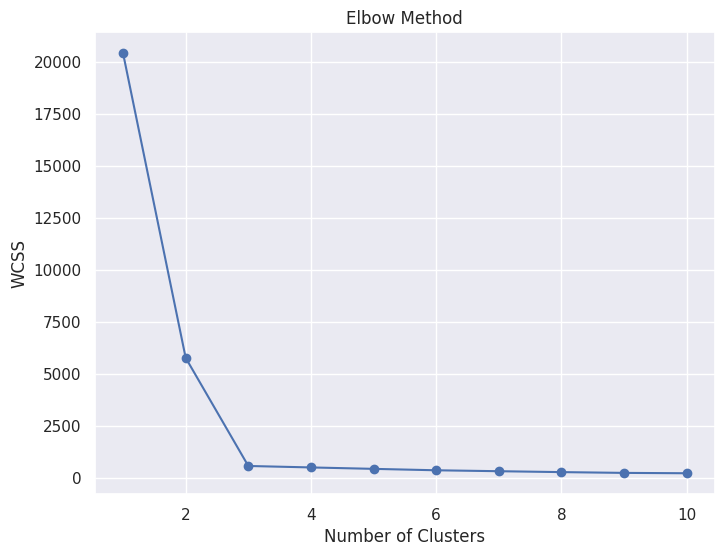

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Choose Optimal k and fit KMeans Model
Based on the elbow point in the plot, we  selected an appropriate value for k. In the graph we can see the elbow point is at n_clusters = 3.

In [10]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=3, n_init=10, random_state=0)

### Visualising Clusters
Assigned labels to clusters and plotted using matplotlib

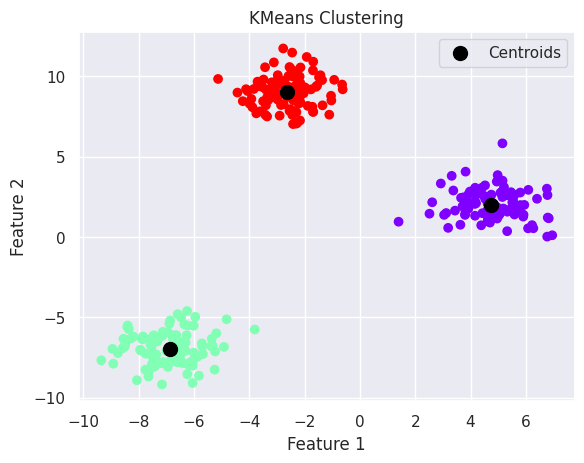

In [11]:
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
